<font color=#CC3D3D>
## Decision Tree Visualization

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

##### Reading data

In [2]:
train = pd.read_csv('clickstreams.csv', encoding='cp949')

##### Feature engineering

In [3]:
train = train.fillna(0)
train = pd.get_dummies(train)

X_train = train.drop(['custid', 'gender'], axis=1)
y_train = train.gender

##### Modeing

In [4]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train).score(X_train, y_train)

0.7002

##### Visualizing decision tree using [graphviz](http://scikit-learn.org/stable/modules/tree.html)

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

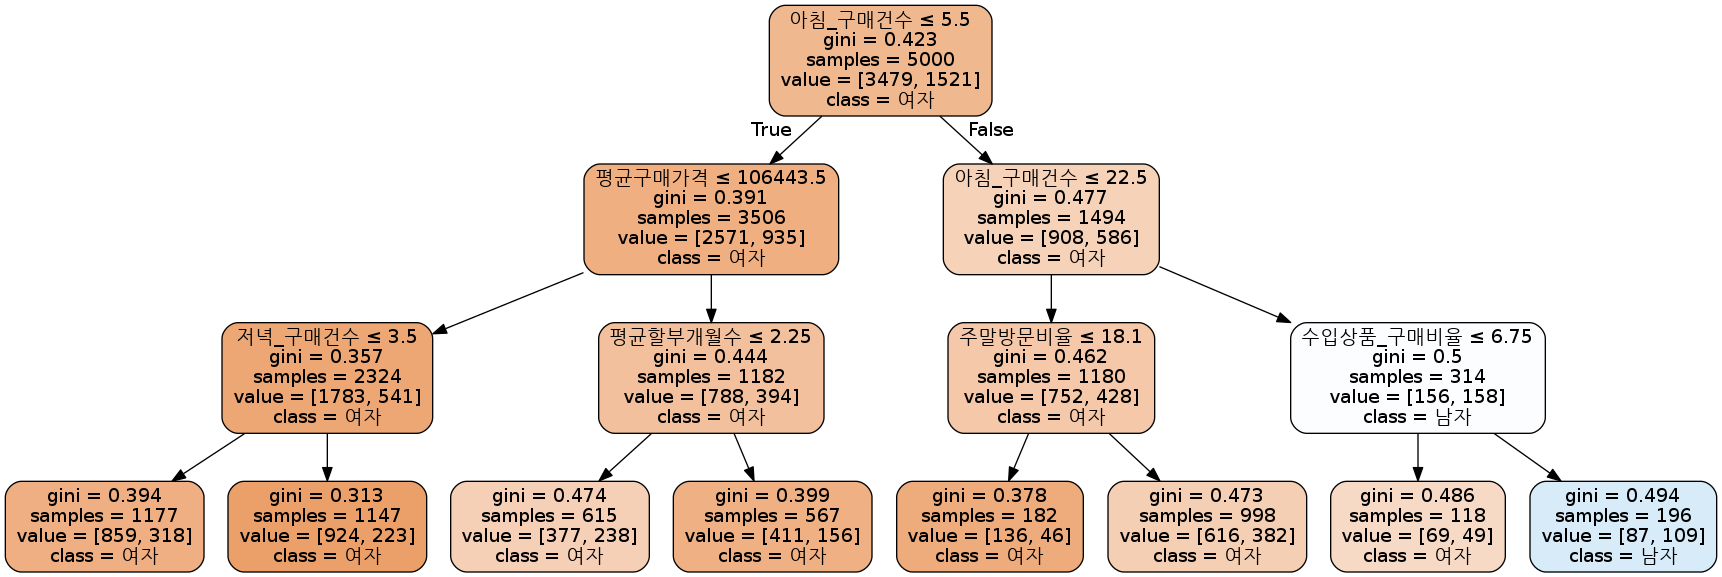

In [6]:
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns,  
                           class_names=['여자','남자'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graph_from_dot_data(dot_data)  
Image(graph.create_png())
#graph.write_pdf("tree_model.pdf") 

##### Visualizing decision tree using [dtreeviz](https://github.com/parrt/dtreeviz)

In [7]:
from dtreeviz.trees import *
#from IPython.display import Image, display_svg

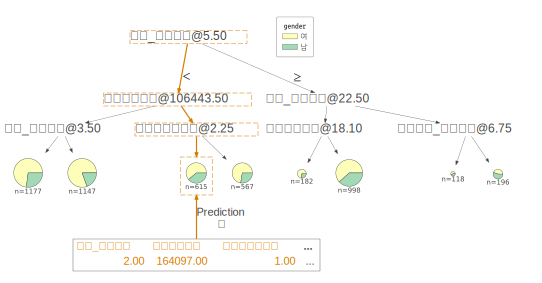

In [8]:
viz = dtreeviz(clf, 
               X_train,
               y_train,
               target_name='gender',
               feature_names=X_train.columns, 
               class_names=['여','남'], 
               X = X_train.loc[np.random.randint(0, len(X_train))],
               fancy=False)  # barstackes is default
viz

<font color=#CC3D3D>
## End